In [1]:
import cv2

In [3]:
import matplotlib.pylot as plt

ModuleNotFoundError: No module named 'matplotlib.pylot'

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels=[]# Empty list of python
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)#Automatically convert the image to RGB

< cv2.dnn.Model 000001308BAEC7D0>

In [7]:
img=cv2.imread('manBMW.jpeg')

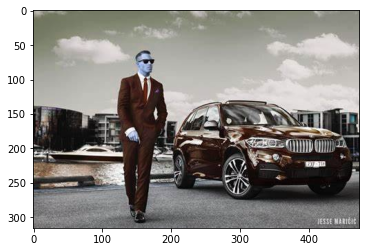

In [8]:
plt.imshow(img)

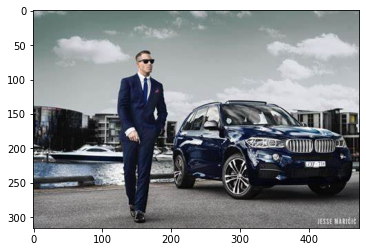

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[3 1]


In [12]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

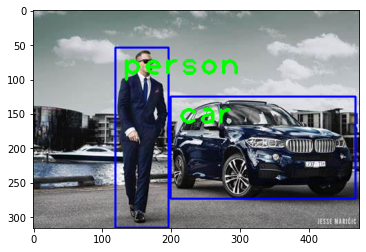

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
cap=cv2.VideoCapture('test2.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    ClassIndex,confidence,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[7]
[7]
[6 3]
[6 6 3 8 6]
[6 6 6 3 3 8 6 6]
[6 6 6 8 3 3 6]
[6 6 6 3 8 3 6 6 3 6]
[6 6 8 6 3 3 6 3 6 6]
[6 6 3 3 8 6 3 6 6 6]
[6 3 3 6 6 3 8 6 3 6 6]
[6 3 6 3 3 6 8 3]
[6 3 6 6 8 3 6 3 6 6]
[6 3 6 3 8 6 3 6 6]
[3 3 6 6 3 8 3 6 3]
[3 6 3 6 3 8 6 6 6]
[6 3 6 3 8 3 6 6]
[6 3 6 3 6 6 3 6 6 8]
[6 3 6 3 3 6 6 6 6 8]
[6 6 3 3 3 6 8 6 3 3]
[6 6 3 3 3 6 8 3 6 3]
[6 6 3 3 3 3 6 6 6]
[6 6 3 6 3 3 6 6]
[6 6 3 3 6 6 3 3]
[6 6 3 3 3 3 6 6]
[6 6 3 3 6 3 3 6]
[6 3 6 3 6 6]
[6 3 3 6 6 6]
[3 6 3 6 6 3 6]
[3 3 6 3 6 1 6 6]
[3 1 6 6 3 3 6 6]
[3 3 6 6 1 6 3]
[3 3 1 6 3 6 6 3 3]
[3 3 1 6 3 3 1 3 6]
[3 3 1 3 6 3 3 6 1 8 6]
[3 3 1 3 3 6 6 6 3]
[3 3 3 1 3 6 6 3]
[3 3 6 3 3]
[3 3 3 6 3]
[3 3 6 3 3 6 3]
[3 3 6 3 3 3 3 8 3]
[3 3 6 3 3 3]
[3 3 3 6 3 3 3 3]
[3 3 3 3 8 6]
[3 3 3 8 3 3 3]
[3 3 3 3 3 3 8 6]
[3 3 3 3 3 6 8]
[3 3 3 3 6]
[3 3 3 3 3 6 8]
[3 3 8 3 3 3 3]
[3 3 3 8 6 6]
[3 3 3 3 3 8]
[3 3 8 3 3 3 3]
[3 3 3 8 3 3 3]
[3 3 3 8 3 3 3]
[3 8 3 3 3 3]
[3 3

[ 3  1  3  1  3  3  1  3  1 10  2  2 10  2  1  3  3]
[ 3  1  3  3  1  3  1  3 10 10 10  3  1  3  1  2]
[ 3  1  3  3  3  1  3 10 10  1  3  1  2  1]
[ 3  1  3  3  3  1 10  3 10  2  3  3  3]
[ 3  3  1  3  3  1  2 10  3 10  1  2  3  3]
[ 3  3  1  3  3  1  1  1 10 10  3  3  2  2  1  3  3  1]
[ 1  3  3  1  3  3  1  1 10  2  3 10  3  3  2  3]
[ 3  1  3  3  1  3  2  1 10  1 10  2  3  3  3  1]
[ 3  3  3  3  1 10  1  2  1 10  3  3  2  1  3]
[ 3  3  3  3 10  1  1  1  3  3 10  1  1  2]
[ 3  3  1  3  2  3 10  1  2  1  1  1  2  2 10  2  3  3  2]
[ 3  3  1  3 10  1  2  3  1  2  1  2  2 10  2  3  2]
[ 3  1  3  3  3 10  1  2  1  2 10  1  1  3  2  2  1  8]
[ 3  1  3  3 10  2  3  1  1  2 10  1  1  3  8 10  1  2]
[ 3  1  3  3  1  3 10  2 10  2  1  3  2  1  2  1  1]
[ 3  1  3  1  3 10  3  1  2 10  1  1  3  2  1  8  3  2]
[ 3  1  1  3  1 10  3  2  3  1  3 10  2  1  2  3 10]
[ 3  1  3  1  1  3 10  1  3  3  1  3 10  2 10]
[ 3  1  1  1  3  2 10  3  1  3  3  1 10  2  2  2  2  3  1]
[ 3  1  1 10  1  3  3  1  1 1

[3 1 1 1 3 3 3 1]
[3 3 3 1 1 1 3 3]
[ 3  1  3  3  1  1 85  3  2]
[3 1 3 3 3 1]
[3 1 3 3 3]
[3 1 3 3 3 1 2]
[3 1 3 3 1 3 3]
[3 1 3 1 3 3]
[3 1 3 1 3 3]
[3 1 3 1 3 3 3]
[3 1 3 1 3 3]
[ 3  1  1  3 85  3  3  3  1  3]
[1 3 3 3 1 1 1]
[3 1 3 3 1 3 1 1]
[3 1 3 3 3 3 1 1 1]
[3 1 3 3 3 3 1 1 1]
[1 3 3 3 3 1 3 1 3]
[1 3 3 3 3 3 1 1 1]
[1 3 3 3 1 3 3 1 1]
[1 3 3 3 3 3 1 1]
[ 3  1  3  3  3 10  3]
[ 3  1  3  3  3 10  1]
[ 3  1  3  3  3  1  1 10]
[ 3  1  3  3  3 10  1  1]
[ 3  3  1  3  3 10]
[3 3 1 3 3 3 1]
[3 3 1 3]
[3 1 3 3]
[3 1 3 3]
[3 3 1 3]
[3 3 1 3]
[3 3 1 3 3]
[3 1 3 3 1 3]
[3 1 3 3 3]
[3 1 3 3 3 3]
[3 3 3 1 3 3 1]
[ 3  3  3  1  1  3 10  3]
[3 1 3 3 1 3]
[3 3 3 1 3 1]
[1 3 3 3 3 1]
[3 1 3 3 3 1]
[1 3 3 3 3 1]
[ 1  3  3  3  3 10]
[ 1  3  3  3 10  3  1]
[ 1  3  3  3  1  3 10]
[1 3 3 3 1 1 1]
[1 1 3 1 3 1]
[1 1 3 1 1 3 3]
[1 1 3 3 3]
[1 3 1 1 3]
[1 1 3 1 3 3 1 1]
[1 3 3 1 3 1]
[3 1 3 3 1]
[3 1 3 3 1]
[3 1 3 3 1]
[ 3  1  3  3 10]
[3 1 3 3]
[3 1 3 3]
[3 1 3 1]
[1 3 3 1]
[1 3 3]
[1 3 3]
[1 3]
[1 3

[ 1  3  1  3  1  1  3  1 41]
[1 3 3 1 3 1 1 1]
[ 1  3  1  3  3  1  1  1 41  1]
[1 3 3 1 1 3 1 1 1 1]
[1 3 3 3 1 1 1 1 1]
[1 3 3 3 1 1 1 1 1 1]
[1 3 3 1 1 3 1 1 1]
[1 3 3 1 3 1 1 1 1 1]
[1 3 3 1 1 1 1 3 1 1]
[1 3 3 3 1 1 1 1 1 1]
[3 3 1 3 1 1 1 1 1 1 1]
[3 3 1 1 3 1 1 1 1 1]
[1 3 3 3 1 1 1 1 1 1]
[1 3 3 1 3 1 1 1 1 1]
[3 3 1 3 1 1 1 1 1]
[3 1 3 1 3 1 1 1 1 1]
[3 3 1 3 1 1 1]
[3 1 3 3 1 1 1 1 1 1]
[1 3 3 3 1 1 1 1]
[1 3 3 3 3 1 1 1]
[1 3 3 3 1 1 1 1]
[1 3 3 1 3 1 1 1 1 1]
[3 1 3 3 1 1 1]
[3 3 1 1 3 1 1 3]
[3 3 3 1 1 1]
[3 3 3 1 1 1 1]
[3 3 1 1 3 1 1 1 1]
[3 3 1 1 1 1 1 1 3]
[3 3 1 1 1 1 1 1 3]
[3 3 1 1 1 1 3 1 1 1]
[3 3 1 1 1 3 1 1 1]
[3 3 3 3 1 1]
[3 3 1 3 3 1 1 1 1 1]
[3 3 3 3 1 1 1 1 1]
[3 3 3 3 1 1 1]
[3 3 3 3 3]
[3 3 3 3 1]
[3 3 1 3 3 3]
[3 3 1 3 3 1 1]
[3 3 1 3 3 1 1]
[3 3 1 3 3 3 1]
[3 3 1 1 3 1 3 1 1 3]
[3 3 1 3 1 1 1 1 1 3 3]
[3 3 1 1 3 1 1 1 3]
[3 3 1 3 1 1 1 1 1 1]
[3 3 1 1 3 1 1]
[1 3 3 3 1 1 1 1]
[ 1  3  3  3  1  1  1  1  1 10]
[ 1  3  3  1  3  1  1  1  1  1 10  1]
[3 3 3 1 

[ 3 10  3  1  1  3 10 10  1 10]
[ 3 10  3  1  1  3 10  1 10]
[ 3 10  3  1  1 10  3  1 10]
[ 3 10  3  1  1 10  3  1 10]
[ 3 10  3  1  1  3  1 10]
[ 3 10  3  1  1  3  1 10]
[ 3 10  3  1  1  3  1 10]
[ 3 10  3  1  1  3  1]
[ 3 10  3  1  1  1  3]
[ 3 10  3  1  1  1  3]
[ 3 10  3  1  1  1  1]
[ 3 10  3  1  1  1]
[ 3 10  3  1  1]
[ 3 10  3  1  1 10]
[ 3 10  3  1  1  1 10]
[ 3 10  3  1  1  3 10 10  1]
[ 3 10  3  1 10  3 10  1]
[ 3 10  3  1 10  3]
[ 3 10  3  1 10  3 10]
[ 3 10  3  1  3 10]
[ 3 10  1  3  3 10 10]
[ 3 10  1  3  3 10 10  1]
[ 3 10  1  3  3 10  3  3 10]
[ 3 10  1  3  3 10  3  3]
[ 3 10  1  3  3  1  1  3  3]
[ 3 10  1  3  3  3  3 10 10  1  1]
[ 3 10  3  1  3  3  3 10  1 10]
[ 3 10  3  1  3  3  3 10]
[ 3 10  3  1  3  3  3]
[ 3 10  3  1  3  1  3  3 10]
[ 3 10  3  1  3  1  3  1  3]
[ 3 10  3  1  1  3  3  1]
[ 3 10  3  1  1  3  3]
[ 3 10  3  1  1  3]
[ 3 10  3  1  1  3 10  3]
[ 3 10  1  3  1  3 10  3]
[ 3 10  1  3  1 10  3]
[ 3 10  1  3  1 10]
[ 3 10  1  3  1 10]
[ 3 10  1  3  1 10  3]

[ 3 10  1  3  1 10  1  1]
[ 3 10  1  3  1 10  1  1 10]
[ 3 10  3  1  1 10  1  1]
[ 3 10  1  3  1 10  1  1]
[ 3 10  1  3  1 10  1  1]
[ 3 10  1  3  1 10  1 10]
[ 3 10  1  3  1 10  1 10  1]
[ 3 10  3  1  1 10  1 10  1 10]
[ 3 10  3  1  1 10  1 10  1 10]
[ 3 10  3  1  1 10  3  1  1 10 10]
[ 3 10  3  1  1  1 10  1  1 10]
[ 3 10  1  3  1 10  1  1  3 10  1]
[ 3 10  1  3  1 10  1  3  1 10]
[ 3 10  1  3  1  1 10  3 10]
[ 3 10  1  3  1  1 10  3 10  1]
[ 3 10  1  3  1 10  1  3  1 10]
[ 3 10  1  3  1  1 10  3  1 10]
[ 3 10  1  3  1  1 10  1  3 10]
[ 3 10  3  1  1 10  1  1  3]
[ 3 10  3  1  1  1 10  1 10]
[ 3 10  1  3  1  1 10  1 10 10]
[ 3 10  3  1  1 10  1  1 10 10]
[ 3 10  3  1 10  1 10 10  1  1 10]
[ 3 10  3  1 10  1 10  1  1 10]
[ 3 10  3  1 10  1 10  1]
[ 3 10  3  1 10  1  1 10 10]
[ 3 10  3  1 10  1 10  1]
[ 3 10  3  1 10  1 10  1]
[ 3 10  3  1 10  1 10  1]
[ 3 10  3  1 10  1 10  1  1]
[ 3  3 10 10  1  1 10  1  1]
[ 3  3 10  1 10 10  1  1]
[ 3  3 10  1 10  1  1 10  1 10]
[ 3  3 10  1 10  1 

[3 1 3 1 1 3 1 3 1]
[ 3  1  3  1  3  1  1  1  1 10  1]
[3 1 3 1 3 1 1 3 1 1]
[ 3  1  3  3  1 10  1  3]
[ 3  1  3 10  3  1  1  1]
[ 3 10  1  3  1  3  1  1]
[ 3 10  1  3  1  3  1  1]
[ 3  1 10  3  1  1  3  1  1]
[ 3  1  3  1  3 10  1  3]
[ 3  1  1  3  3 10  1  1  1]
[ 3  1  3  1  3  1 10]
[ 3  1  1  3  3  1 10]
[ 3  1  1  3  3  1 10]
[ 3  1  3  1 10  3  1]
[ 3  1  3  1  3 10  1]
[3 1 3 3 1 1]
[3 1 3 3]
[3 3 1 3 1 1]
[3 3 3 1 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3]
[3 3 3 3 1]
[3 3 3 3 1 1]
[3 3 1 3 3]
[3 3 1 3 1 3]
[3 3 1 3 1 1 3]
[3 3 1 1 1 3 1 3]
[3 3 1 1 3 1 1 3]
[3 3 1 3 1 1 1 1 3]
[3 3 1 1 1 1 3 1]
[3 3 1 1 3 1 1 1]
[3 3 1 1 3 1]
[3 3 1 1 1 3 1 1 1]
[3 3 1 1 1 1 3]
[3 3 1 1 1 3]
[3 3 3 1 1]
[3 3 3 1]
[3 3 3]
[3 3 3]
[3 3 3 1]
[ 3  3  3  1 10]
[3 3 3 1 3 1]
[3 3 1 3 1 3]
[3 3 3 3]
[3 3 3 3]
[ 3  3  3 10]
[3 3 3 3]
[3 3 3 3]
[3 3 3 1]
[3 3 3 1]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3 1]
[3 3 3 1]
[3 3 1 3]
[3 3 3]
[3 3 3]
[3 3 3 1]
[3 3 3]
[3 3 3]
[3 3 3 3]
[3 3 3 3 1]
[3 3 3 1]
[3 3 

KeyboardInterrupt: 